In [1]:
#https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

'''
Exploring and Processing the Data
Building and Training our Neural Network
Visualizing Loss and Accuracy
Adding Regularization to our Neural Network
'''

'\nExploring and Processing the Data\nBuilding and Training our Neural Network\nVisualizing Loss and Accuracy\nAdding Regularization to our Neural Network\n'

In [2]:
import pandas as pd

df = pd.read_csv('Combined_Izmir_full.csv')

#https://www.youtube.com/watch?v=2IpFKLohxOI
# shuffle the generated data
#ds = df.sample(frac=1)
df.head(5)

,Floor_Area,Floor_Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,schedule_recorded,Window_Count,w_north,w_north-east,...,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west,Cooling,Heating,Lighting,Equipment
0,50.33,5,0.114,0.114,0.057,0,0,4,0,0,...,0,0,0,0,1,1,53.25,37.55,7.56,2.38
1,61.50,3,0.102,0.102,0.051,1,2,3,0,1,...,0,0,0,0,1,1,21.82,23.23,7.02,2.38
2,77.37,2,0.048,0.048,0.024,0,0,4,0,1,...,1,0,0,0,0,0,31.13,30.83,11.55,2.38
3,150.28,4,0.051,0.051,0.026,0,2,5,0,1,...,1,1,1,0,0,1,56.48,62.20,6.83,2.38
4,105.60,1,0.048,0.048,0.024,0,2,3,0,0,...,1,1,0,0,1,1,50.08,23.49,7.05,2.38


In [3]:
# drop other prediction columns
df= df.drop(['Heating','Lighting','Equipment'], axis = 1)

dataset = df.values
dataset

array([[5.0330e+01, 5.0000e+00, 1.1400e-01, ..., 1.0000e+00, 1.0000e+00,
        5.3250e+01],
       [6.1500e+01, 3.0000e+00, 1.0200e-01, ..., 1.0000e+00, 1.0000e+00,
        2.1820e+01],
       [7.7370e+01, 2.0000e+00, 4.8000e-02, ..., 0.0000e+00, 0.0000e+00,
        3.1130e+01],
       ...,
       [4.8400e+01, 3.0000e+00, 4.6000e-02, ..., 0.0000e+00, 1.0000e+00,
        2.9170e+01],
       [1.3793e+02, 1.0000e+00, 1.3400e-01, ..., 1.0000e+00, 1.0000e+00,
        1.1100e+01],
       [1.1235e+02, 3.0000e+00, 6.1000e-02, ..., 0.0000e+00, 0.0000e+00,
        2.2350e+01]])

In [4]:
X = dataset[:, 0:25]
Y = dataset[:,25]

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)
X_scale.shape[1]

25

In [6]:
from sklearn.model_selection import train_test_split
#splitting of train and test set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.1)
#splitting of test and validaiton set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1820, 25) (101, 25) (102, 25) (1820,) (101,) (102,)


In [16]:
#Setting up the architecture
'''
Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation
'''
from keras.models import Sequential
from keras.layers import Dense
'''
# binary classification
model = Sequential([    
    Dense(32, activation='relu', input_shape=(25,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='sigmoid'),])
'''
# regression
model = Sequential([Dense(32, activation='relu', input_dim=X_scale.shape[1]), 
                    Dense(32, activation='relu'),
                    Dense(1)])

In [17]:
model.compile(optimizer='adam',              
              loss='mean_squared_error',              
              metrics=['accuracy'])

#https://keras.io/losses/
#model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [18]:
hist = model.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))

Train on 1820 samples, validate on 101 samples
Epoch 1/100
1820/1820 [==============================] - 0s 241us/step - loss: 1133.6395 - accuracy: 0.0000e+00 - val_loss: 1092.6888 - val_accuracy: 0.0000e+00
Epoch 2/100
1820/1820 [==============================] - 0s 39us/step - loss: 647.7961 - accuracy: 0.0000e+00 - val_loss: 313.7436 - val_accuracy: 0.0099
Epoch 3/100
1820/1820 [==============================] - 0s 39us/step - loss: 172.9184 - accuracy: 0.0000e+00 - val_loss: 192.0650 - val_accuracy: 0.0000e+00
Epoch 4/100
1820/1820 [==============================] - 0s 38us/step - loss: 144.8239 - accuracy: 0.0000e+00 - val_loss: 173.1321 - val_accuracy: 0.0000e+00
Epoch 5/100
1820/1820 [==============================] - 0s 42us/step - loss: 131.5224 - accuracy: 0.0000e+00 - val_loss: 158.0134 - val_accuracy: 0.0000e+00
Epoch 6/100
1820/1820 [==============================] - 0s 39us/step - loss: 121.5413 - accuracy: 0.0000e+00 - val_loss: 147.0029 - val_accuracy: 0.0000e+00
Epoch 

1820/1820 [==============================] - 0s 41us/step - loss: 62.1281 - accuracy: 5.4945e-04 - val_loss: 79.7228 - val_accuracy: 0.0000e+00
Epoch 54/100
1820/1820 [==============================] - 0s 43us/step - loss: 62.1172 - accuracy: 0.0000e+00 - val_loss: 76.4305 - val_accuracy: 0.0000e+00
Epoch 55/100
1820/1820 [==============================] - 0s 43us/step - loss: 61.5449 - accuracy: 0.0000e+00 - val_loss: 81.1973 - val_accuracy: 0.0000e+00
Epoch 56/100
1820/1820 [==============================] - 0s 42us/step - loss: 61.5905 - accuracy: 5.4945e-04 - val_loss: 76.7418 - val_accuracy: 0.0000e+00
Epoch 57/100
1820/1820 [==============================] - 0s 37us/step - loss: 61.0417 - accuracy: 0.0000e+00 - val_loss: 76.7084 - val_accuracy: 0.0000e+00
Epoch 58/100
1820/1820 [==============================] - 0s 35us/step - loss: 60.6313 - accuracy: 0.0000e+00 - val_loss: 78.6731 - val_accuracy: 0.0000e+00
Epoch 59/100
1820/1820 [==============================] - 0s 35us/step 

In [38]:
# have the index 1 after the model.evaluate function is because the function returns 
# the loss as the first element and the accuracy as the second element. 
model.evaluate(X_test, Y_test)[1]

from sklearn import metrics
import numpy as np

# Predict
pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,Y_test)
#print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
#print("Final score (RMSE): {}".format(score))

102/102 [==============================] - 0s 68us/step


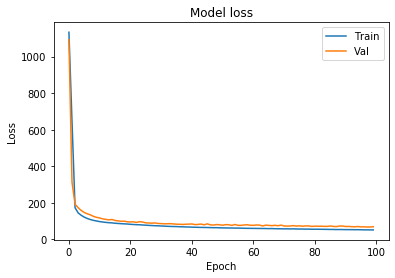

In [22]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

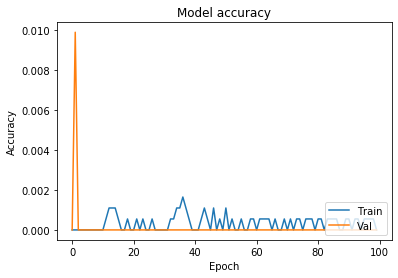

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
#Adding Regularization
'''
Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster.
'''
model_2 = Sequential([    
    Dense(1000, activation='relu', input_dim=X_scale.shape[1]),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1),])

model_2.compile(optimizer='adam',              
                loss='mean_squared_error',              
                metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,          
                     batch_size=32, epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1820 samples, validate on 101 samples
Epoch 1/100
1820/1820 [==============================] - 3s 1ms/step - loss: 261.3410 - accuracy: 5.4945e-04 - val_loss: 134.3221 - val_accuracy: 0.0000e+00
Epoch 2/100
1820/1820 [==============================] - 2s 1ms/step - loss: 93.1574 - accuracy: 5.4945e-04 - val_loss: 91.6591 - val_accuracy: 0.0000e+00
Epoch 3/100
1820/1820 [==============================] - 2s 1ms/step - loss: 74.4599 - accuracy: 0.0000e+00 - val_loss: 84.3422 - val_accuracy: 0.0000e+00
Epoch 4/100
1820/1820 [==============================] - 2s 1ms/step - loss: 62.6319 - accuracy: 0.0011 - val_loss: 88.5193 - val_accuracy: 0.0000e+00
Epoch 5/100
1820/1820 [==============================] - 2s 1ms/step - loss: 60.7026 - accuracy: 5.4945e-04 - val_loss: 108.9009 - val_accuracy: 0.0000e+00
Epoch 6/100
1820/1820 [==============================] - 2s 1ms/step - loss: 55.2494 - accuracy: 0.0011 - val_loss: 67.5174 - val_accuracy: 0.0000e+00
Epoch 7/100
1820/1820 [=====

Epoch 54/100
1820/1820 [==============================] - 2s 1ms/step - loss: 11.1886 - accuracy: 0.0016 - val_loss: 73.7081 - val_accuracy: 0.0000e+00
Epoch 55/100
1820/1820 [==============================] - 2s 1ms/step - loss: 9.9331 - accuracy: 0.0011 - val_loss: 70.9489 - val_accuracy: 0.0000e+00
Epoch 56/100
1820/1820 [==============================] - 2s 1ms/step - loss: 10.7170 - accuracy: 0.0016 - val_loss: 77.0469 - val_accuracy: 0.0000e+00
Epoch 57/100
1820/1820 [==============================] - 3s 1ms/step - loss: 11.4465 - accuracy: 0.0011 - val_loss: 67.5690 - val_accuracy: 0.0000e+00
Epoch 58/100
1820/1820 [==============================] - 2s 1ms/step - loss: 9.7207 - accuracy: 0.0022 - val_loss: 80.0267 - val_accuracy: 0.0000e+00
Epoch 59/100
1820/1820 [==============================] - 2s 1ms/step - loss: 17.0509 - accuracy: 5.4945e-04 - val_loss: 73.1581 - val_accuracy: 0.0000e+00
Epoch 60/100
1820/1820 [==============================] - 3s 1ms/step - loss: 12.5636 

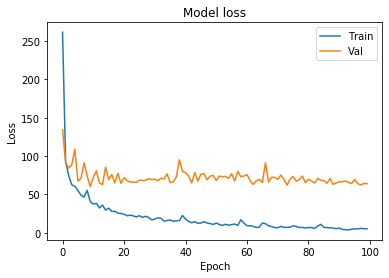

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# this is over-fitting

In [45]:
# have the index 1 after the model.evaluate function is because the function returns 
# the loss as the first element and the accuracy as the second element. 
model.evaluate(X_test, Y_test)

from sklearn import metrics

# Predict
pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Final score (RMSE): {}".format(score))


102/102 [==============================] - 0s 39us/step
Final score (MSE): 71.85217637510135
Final score (RMSE): 8.47656630806964


In [46]:
#deal with over-fitting problem
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_dim=X_scale.shape[1]),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1,kernel_regularizer=regularizers.l2(0.01)),])

model_3.compile(optimizer='adam',              
                loss='mean_squared_error',              
                metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,          
                     batch_size=32, epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1820 samples, validate on 101 samples
Epoch 1/100
1820/1820 [==============================] - 3s 2ms/step - loss: 219.0920 - accuracy: 0.0000e+00 - val_loss: 123.2688 - val_accuracy: 0.0000e+00
Epoch 2/100
1820/1820 [==============================] - 3s 2ms/step - loss: 115.9097 - accuracy: 5.4945e-04 - val_loss: 141.1942 - val_accuracy: 0.0000e+00
Epoch 3/100
1820/1820 [==============================] - 3s 2ms/step - loss: 103.9328 - accuracy: 5.4945e-04 - val_loss: 129.5285 - val_accuracy: 0.0000e+00
Epoch 4/100
1820/1820 [==============================] - 3s 2ms/step - loss: 101.7612 - accuracy: 0.0000e+00 - val_loss: 104.0274 - val_accuracy: 0.0000e+00
Epoch 5/100
1820/1820 [==============================] - 3s 2ms/step - loss: 94.9224 - accuracy: 5.4945e-04 - val_loss: 111.0373 - val_accuracy: 0.0000e+00
Epoch 6/100
1820/1820 [==============================] - 4s 2ms/step - loss: 88.3037 - accuracy: 5.4945e-04 - val_loss: 102.6049 - val_accuracy: 0.0000e+00
Epoch 7/100
1

1820/1820 [==============================] - 4s 2ms/step - loss: 44.7574 - accuracy: 0.0011 - val_loss: 69.5740 - val_accuracy: 0.0000e+00
Epoch 54/100
1820/1820 [==============================] - 3s 2ms/step - loss: 42.6476 - accuracy: 0.0016 - val_loss: 86.2908 - val_accuracy: 0.0000e+00
Epoch 55/100
1820/1820 [==============================] - 3s 2ms/step - loss: 41.5939 - accuracy: 5.4945e-04 - val_loss: 76.5649 - val_accuracy: 0.0000e+00
Epoch 56/100
1820/1820 [==============================] - 3s 2ms/step - loss: 39.0643 - accuracy: 5.4945e-04 - val_loss: 70.6205 - val_accuracy: 0.0000e+00
Epoch 57/100
1820/1820 [==============================] - 3s 2ms/step - loss: 36.6161 - accuracy: 5.4945e-04 - val_loss: 71.2536 - val_accuracy: 0.0000e+00
Epoch 58/100
1820/1820 [==============================] - 3s 2ms/step - loss: 41.5972 - accuracy: 5.4945e-04 - val_loss: 74.8913 - val_accuracy: 0.0000e+00
Epoch 59/100
1820/1820 [==============================] - 3s 2ms/step - loss: 37.9428

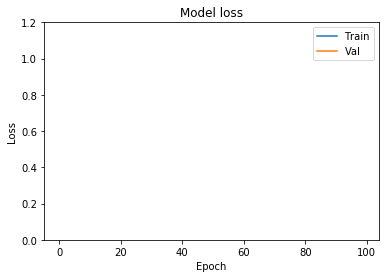

In [48]:

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

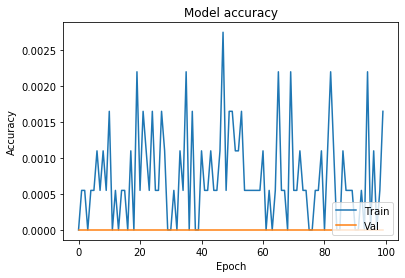

In [49]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [50]:
# SUMMARY
'''
Explore and Process the Data
Build and Train our Neural Network
Visualize Loss and Accuracy
Add Regularization to our Neural Network
'''

'\nExplore and Process the Data\nBuild and Train our Neural Network\nVisualize Loss and Accuracy\nAdd Regularization to our Neural Network\n'